In [1]:
#Step 1: Set up the environment

# import spacec first
import spacec as sp
# import standard packages
import os
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sc.settings.set_figure_params(dpi=80, facecolor='white') 
# set the default color map to viridis, the below paramters can be chanaged
matplotlib.rcParams["image.cmap"] = 'viridis'

# Specify the path to the data
root_path = "/homes/zhanyx3/PTPN2_phenocycler/" # replace with your path
data_path = root_path + 'Images/' # where the data is stored

# where you want to store the output
output_dir = root_path + 'Yao/output/'
os.makedirs(output_dir, exist_ok=True)

/homes/zhanyx3/miniconda3/envs/spacec/lib/python3.10/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound
2025-10-21 09:55:56.423093: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/R/4.3.1/lib/R/lib:/.singularity.d/libs:/lib:/usr/local/lib:/usr/lib/x86_64-linux-gnu:/usr/lib/jvm/java-11-openjdk-amd64/lib/server
2025-10-21 09:55:56.423112: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Reading in the qptiff file, might take awhile!
Loaded nuclear image of dimension (Y,X) = (47520, 33600)


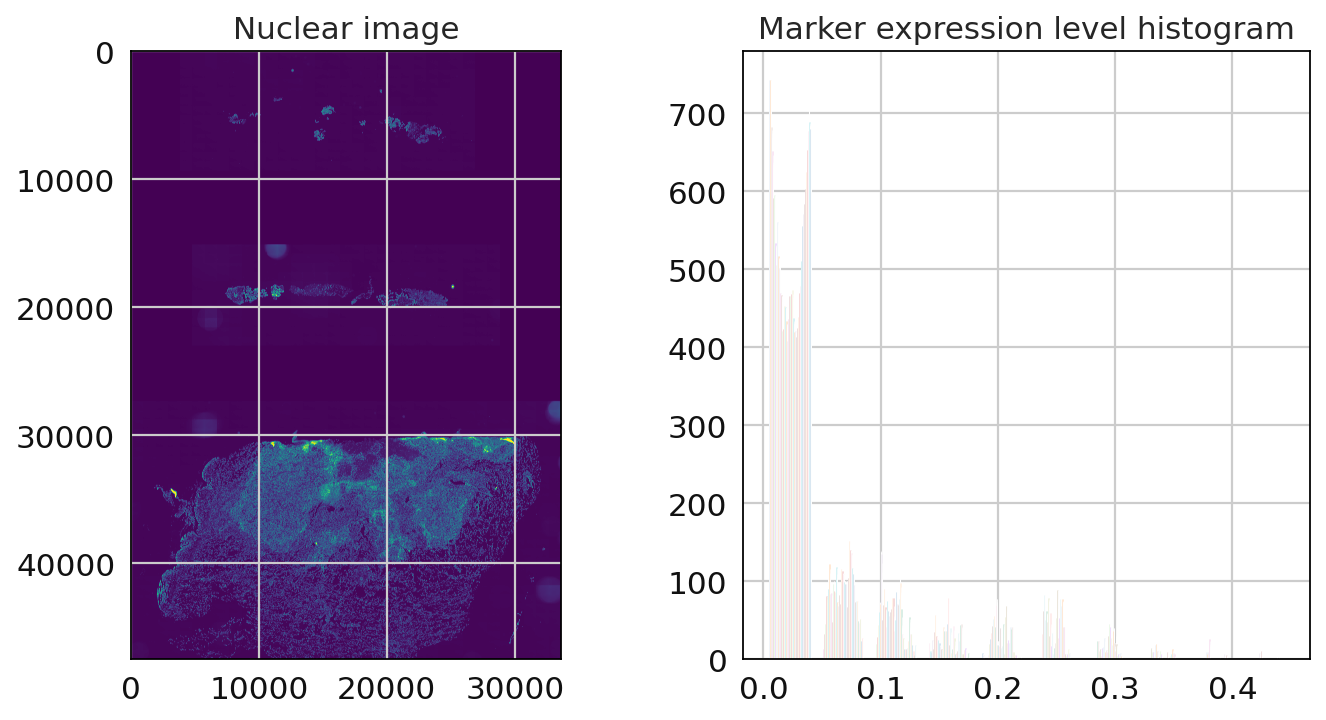

returning scaled down image!


In [2]:
#A Step 2: Downscale the tissue image

# specify the image file for extraction
file = 'M20-124 30012-1_SCR-1_ML2308048_OTX-1_ML2308050_NSCLC_S04_PCF.ome.tif' # the file name of the image, can be qptiff or tiff
file_path = data_path + file # the path to the image

# downscale your image for easy segmentation computation
resized_im = sp.hf.downscale_tissue(file_path = file_path, # where qptiff or tiff is stored
                                    downscale_factor = 64, # the downscale factor for the image
                                    padding = 50, # the padding to add to the image
                                    output_dir = output_dir # where to store the downscale image
                                    )

Identified 5 tissue pieces


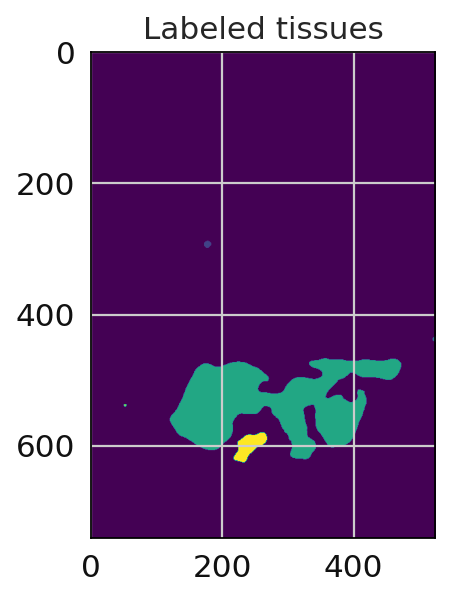

Saving the labels from the segmentation!


In [3]:
#A Step 3: Visualize tissue region number Segment individual tissue pieces

tissueframe = sp.tl.label_tissue(resized_im, # the downsampled image
                                 lower_cutoff = 0.2, #the lower cutoff of the image intensity for the tissue
                                 upper_cutoff = 0.21 #the upper cutoff of the image intensity for the tissue
                                 )


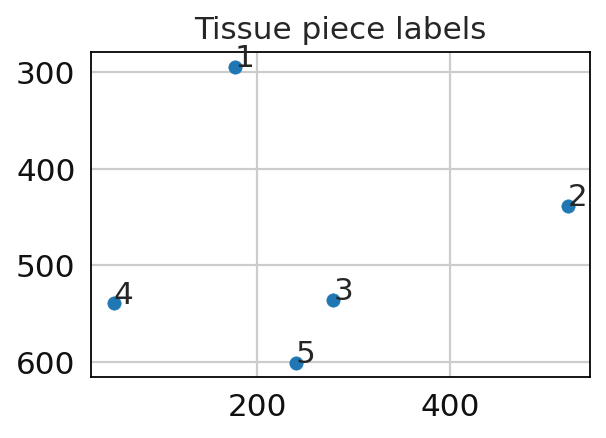

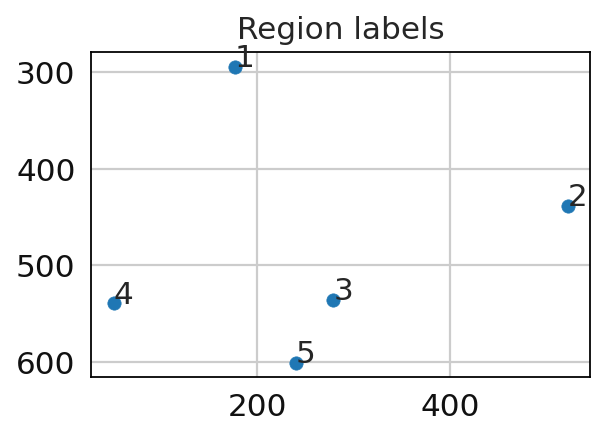

In [4]:
tissueframe.head()

#Rename tissue number (optional)
# Manually assign the tissue pieces to the regions
sp.pl.tissue_lables(tissueframe=tissueframe, #the data frame with pixel assignment to each tissue piece or region
                    region = 'region1')

Reading in the qptiff file, might take awhile!


/homes/zhanyx3/miniconda3/envs/spacec/lib/python3.10/site-packages/spacec/tools/_qptiff_converter.py:123: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tissueframe2 = tissueframe.groupby(region).agg([min, max])
/homes/zhanyx3/miniconda3/envs/spacec/lib/python3.10/site-packages/spacec/tools/_qptiff_converter.py:123: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tissueframe2 = tissueframe.groupby(region).agg([min, max])


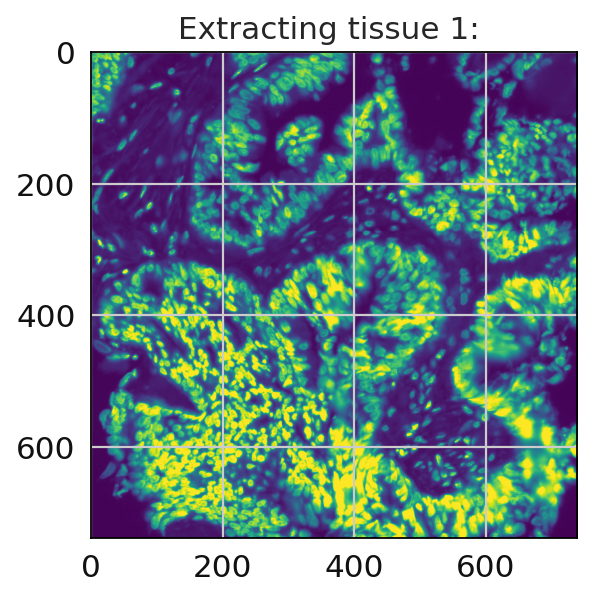

Saving tissue image at /homes/zhanyx3/PTPN2_phenocycler/Yao/output/reg001_X01_Y01_Z01.tif


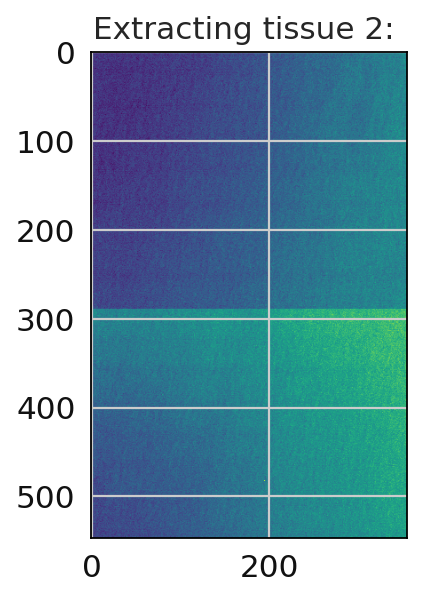

Saving tissue image at /homes/zhanyx3/PTPN2_phenocycler/Yao/output/reg002_X01_Y01_Z01.tif


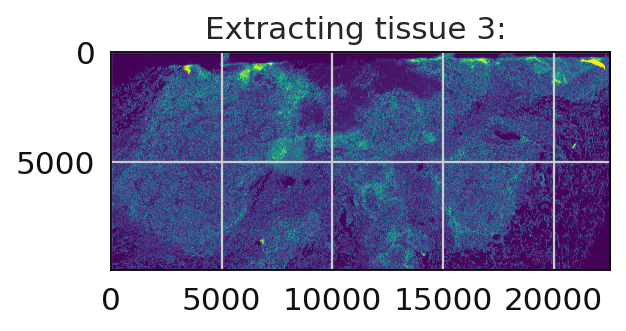

Saving tissue image at /homes/zhanyx3/PTPN2_phenocycler/Yao/output/reg003_X01_Y01_Z01.tif


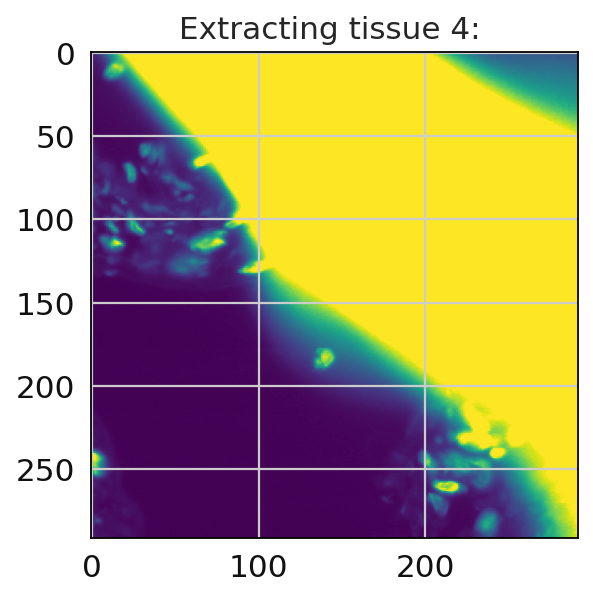

Saving tissue image at /homes/zhanyx3/PTPN2_phenocycler/Yao/output/reg004_X01_Y01_Z01.tif


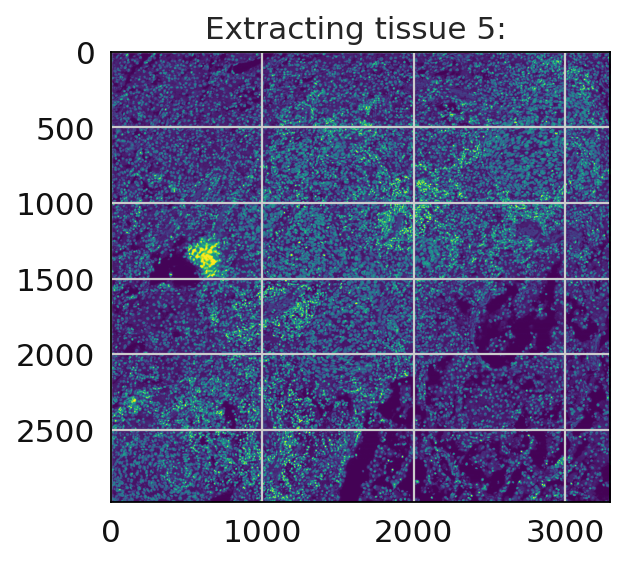

Saving tissue image at /homes/zhanyx3/PTPN2_phenocycler/Yao/output/reg005_X01_Y01_Z01.tif


In [5]:
#A Step 4: Extract individual labeled tissues into sep811 arate tiff stacks

sp.tl.save_labelled_tissue(filepath=file_path, 
                           tissueframe=tissueframe, # the data frame with pixel assignment to each tissue piece or region
                           output_dir = output_dir, # where to store the image
                           downscale_factor = 64, # the downscale factor for the image
                           region = 'region1', 
                           padding = 50 # the padding to add to the image
                           )


In [6]:
import tifffile
with tifffile.TiffFile(file_path) as tif:
    print(tif.pages[0].tags)
    # Or try to extract channel names if available:
    print(tif.series[0].axes)


TiffTag 256 ImageWidth @24 LONG @36 = 33600
TiffTag 257 ImageLength @44 LONG @56 = 47520
TiffTag 258 BitsPerSample @64 SHORT @76 = 8
TiffTag 259 Compression @84 SHORT @96 = DEFLATE
TiffTag 262 PhotometricInterpretation @104 SHORT @116 = MINISBLACK
TiffTag 270 ImageDescription @124 ASCII[5369] @19573961714 = <?xml version="1.0
TiffTag 277 SamplesPerPixel @144 SHORT @156 = 1
TiffTag 282 XResolution @164 RATIONAL @176 = (1, 1)
TiffTag 283 YResolution @184 RATIONAL @196 = (1, 1)
TiffTag 296 ResolutionUnit @204 SHORT @216 = NONE
TiffTag 305 Software @224 ASCII[12] @352 = tifffile.py
TiffTag 322 TileWidth @244 LONG @256 = 512
TiffTag 323 TileLength @264 LONG @276 = 512
TiffTag 324 TileOffsets @284 LONG8[6138] @364 = (74064, 74340, 74616, 74892, 75
TiffTag 325 TileByteCounts @304 LONG[6138] @49468 = (276, 276, 276, 276, 276, 2
TiffTag 330 SubIFDs @324 IFD8[4] @74020 = (14850845384, 18329153486, 1926205738
CYX


In [7]:
# read in compiled measurement csv, to extract channelnames.txt
df = pd.read_csv('/homes/zhanyx3/PTPN2_phenocycler/Cell_Data/NSCLC_measurements.csv')
# df.columns
# ## write the metadata to csv
# pd.Series(df.columns).to_csv('/homes/zhanyx3/PTPN2_phenocycler/Yao/output/column_names_NSCLC.csv', 
#                              index=False, header=False)


import re
channelnames = [re.match(r'^Nucleus: (.*): Median$', col).group(1)
                  for col in df.columns if re.match(r'^Nucleus: .*: Median$', col)]

#The `(.*)` captures whatever text appears between 'Nucleus: ' and ': Median'.
#`group(1)` gives you exactly the text matched by `(.*)`.

# Save to CSV
# to_save = pd.Series(channelnames)
# to_save.to_csv('/homes/zhanyx3/PTPN2_phenocycler/Yao/output/channelnames.csv', index=False, header=False)

#To save your results (such as a list of column names) to a text file in Python, use this pattern:
with open('/homes/zhanyx3/PTPN2_phenocycler/Yao/output/channelnames_NSCLC.txt', 'w') as f:
    for item in channelnames:
        f.write(str(item) + '\n')

Formatting Multichannel image (57 channels)...
Formatted 57 Multichannel channels.
Combining channels ['E-cadherin'] into 'segmentation_channel' using max projection.


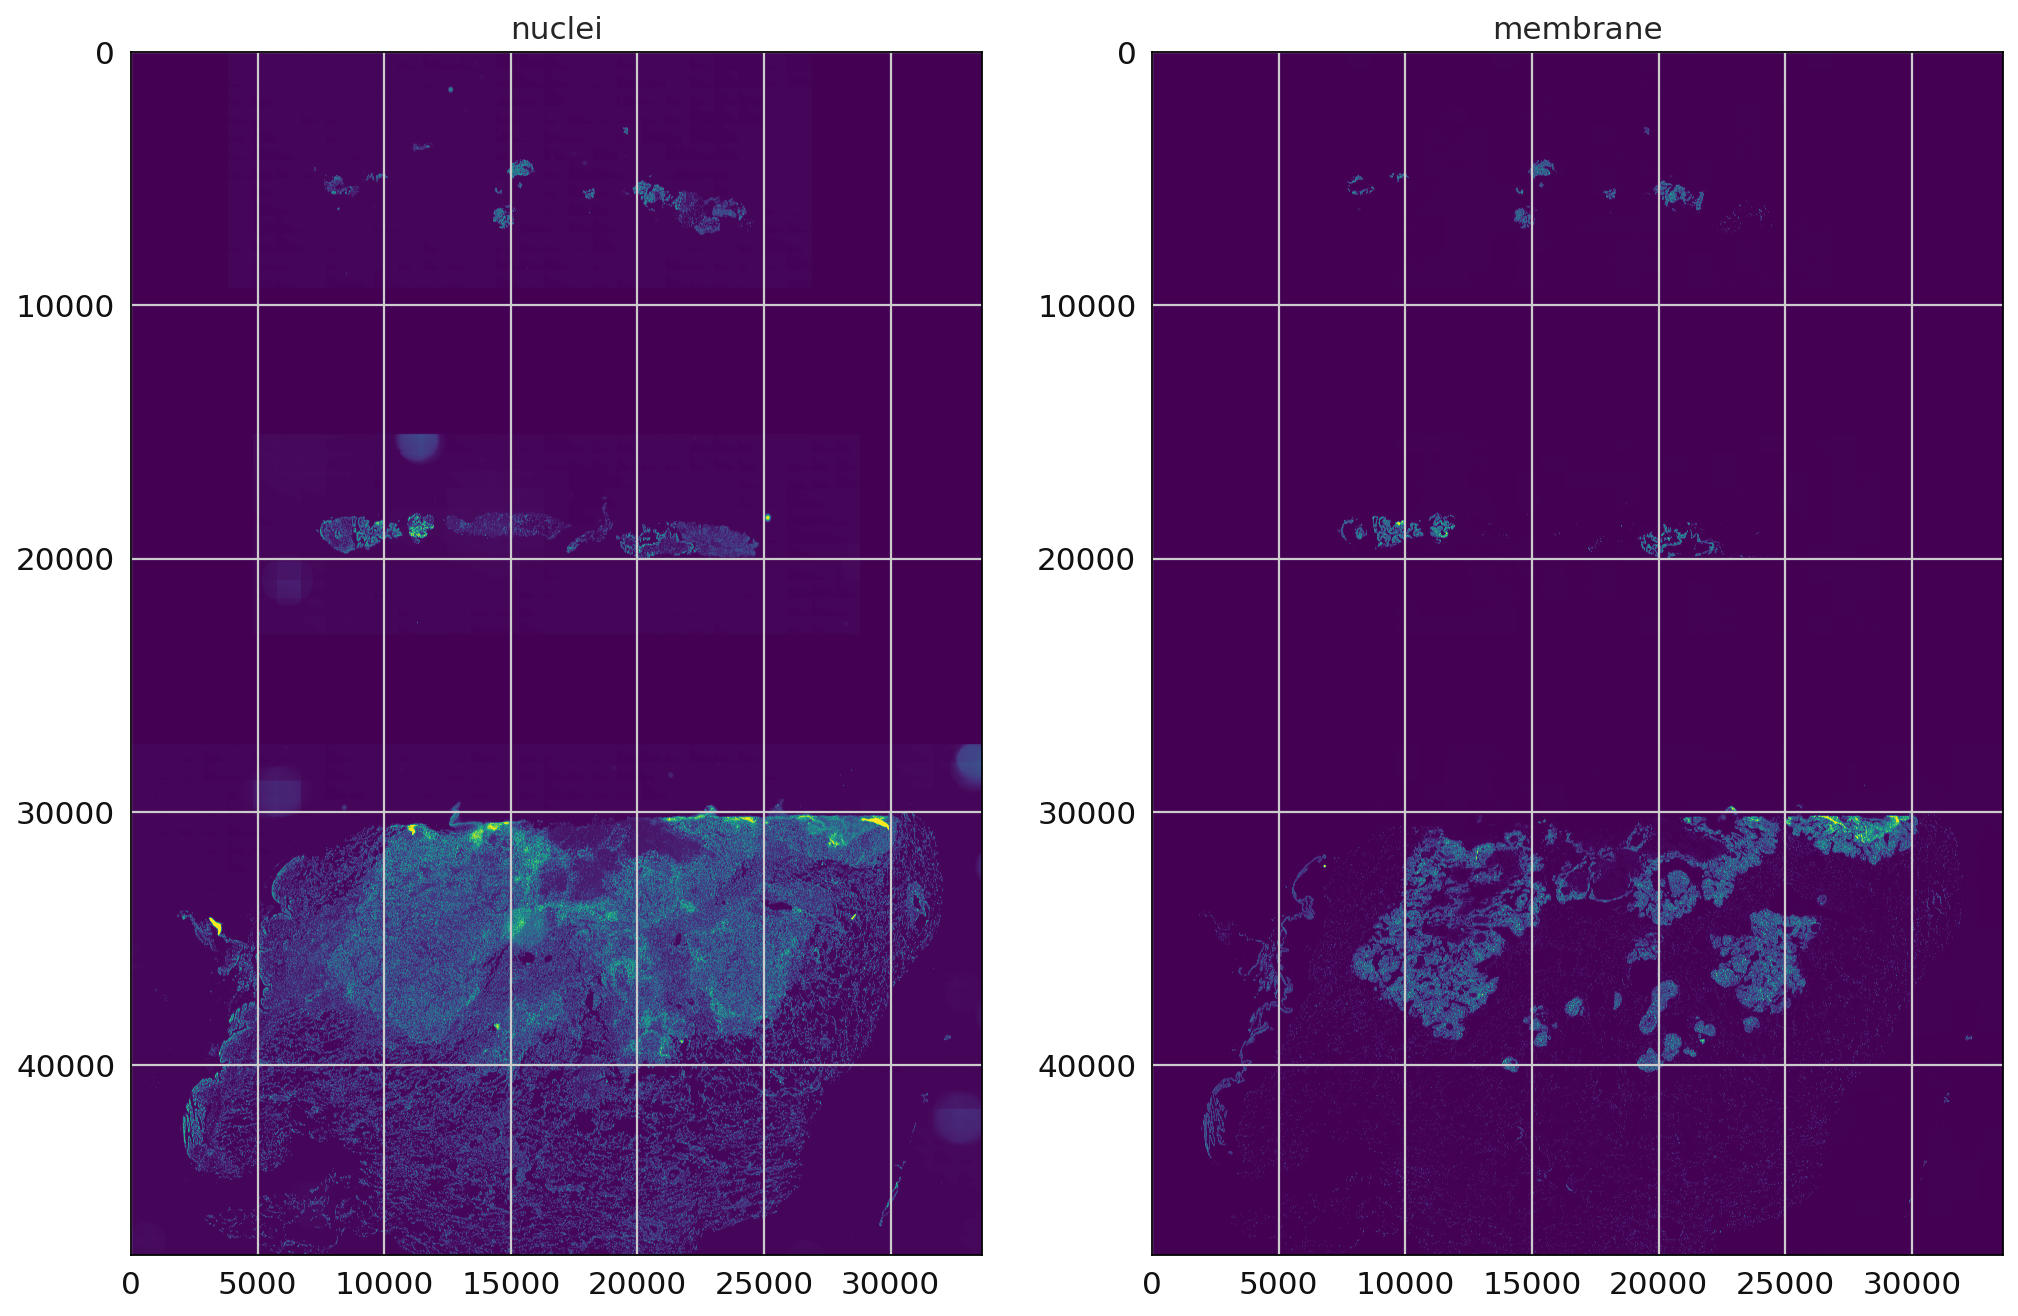

In [9]:
# B  Cell segmentation and visualization.
#Step 5: Visualize segmentation channel

# (optional, one can just use nuclei for segmentation)
# Visualize membrane channels to use for cell segmentation 

sp.pl.segmentation_ch(
    file_name = file_path, # image for segmentation
    channel_file = output_dir + 'channelnames_NSCLC.txt', # all channels used for staining
    output_dir = output_dir, #
    extra_seg_ch_list = ['E-cadherin','Pan_Cytokeratin'], #default is None; if provide more than one channel, then they will be combined
    nuclei_channel = 'DAPI', # channel to use for nuclei segmentation
    input_format = 'Multichannel', 
)

In [10]:
#B.2. Step 6: Cell segmentation
# choose between cellpose or mesmer for segmentation
# seg_output contains {'img': img, 'image_dict': image_dict, 'masks': masks}

seg_output = sp.tl.cell_segmentation(
    file_name = file_path,
    channel_file = output_dir + 'channelnames_NSCLC.txt',
    output_dir = output_dir,
    seg_method ='mesmer', # cellpose or mesmer
    nuclei_channel = 'DAPI',
    output_fname = 'NSCLC',
    membrane_channel_list = ['E-cadherin','Pan_Cytokeratin'], #default is None; if provide more than one channel, then they will be combined
    compartment = 'whole-cell', # mesmer # segment whole cells or nuclei only
    input_format ='Multichannel', # Phenocycler or codex
    resize_factor=1, # default is 1; if the image is too large, lower the value. Lower values will speed up the segmentation but may reduce the accuracy.
    size_cutoff = 0)


--- Tile Processing Progress ---
Image Size: 33600x47520 | Grid: 9x12 | Total Tiles: 108
Completed: 108/108 (100.0%)
┌─────────────────┐
│✓ ✓ ✓ ✓ ✓ ✓ ✓ ✓ ✓│
│✓ ✓ ✓ ✓ ✓ ✓ ✓ ✓ ✓│
│✓ ✓ ✓ ✓ ✓ ✓ ✓ ✓ ✓│
│✓ ✓ ✓ ✓ ✓ ✓ ✓ ✓ ✓│
│✓ ✓ ✓ ✓ ✓ ✓ ✓ ✓ ✓│
│✓ ✓ ✓ ✓ ✓ ✓ ✓ ✓ ✓│
│✓ ✓ ✓ ✓ ✓ ✓ ✓ ✓ ✓│
│✓ ✓ ✓ ✓ ✓ ✓ ✓ ✓ ✓│
│✓ ✓ ✓ ✓ ✓ ✓ ✓ ✓ ✓│
│✓ ✓ ✓ ✓ ✓ ✓ ✓ ✓ ✓│
│✓ ✓ ✓ ✓ ✓ ✓ ✓ ✓ ✓│
│✓ ✓ ✓ ✓ ✓ ✓ ✓ ✓ ✓│
└─────────────────┘
Legend: P = Processing, ✓ = Completed, □ = Pending


Stitching masks...
Stitching 108 masks with overlap=128, sigma=64...
  Preparing tiles (label offset and confidence)...
  Skipped 14 empty or invalid tiles.
  Processed 94 tiles in first pass. Max label offset: 802030
  Merging tiles...
  Relabeling final mask...
  Relabeling complete. Final max label: 749467
Stitching finished in 1294.55 seconds.
Resizing final mask to original image shape...

--- Extracting Features ---
Quantifying features for segmented objects...
--- Starting Feature Extraction ---
Calculating morphological features...
Cal

Processing channels: 100%|██████████| 57/57 [18:13<00:00, 19.19s/it]


Combining morphology and intensity features...
Successfully saved features for 749467 objects to /homes/zhanyx3/PTPN2_phenocycler/Yao/output/NSCLC_features.csv
--- Feature Extraction Complete ---
Saved features to /homes/zhanyx3/PTPN2_phenocycler/Yao/output/NSCLC_features.csv

--- Segmentation Pipeline Complete ---


Combining channels ['E-cadherin'] into 'segmentation_channel' using max projection.


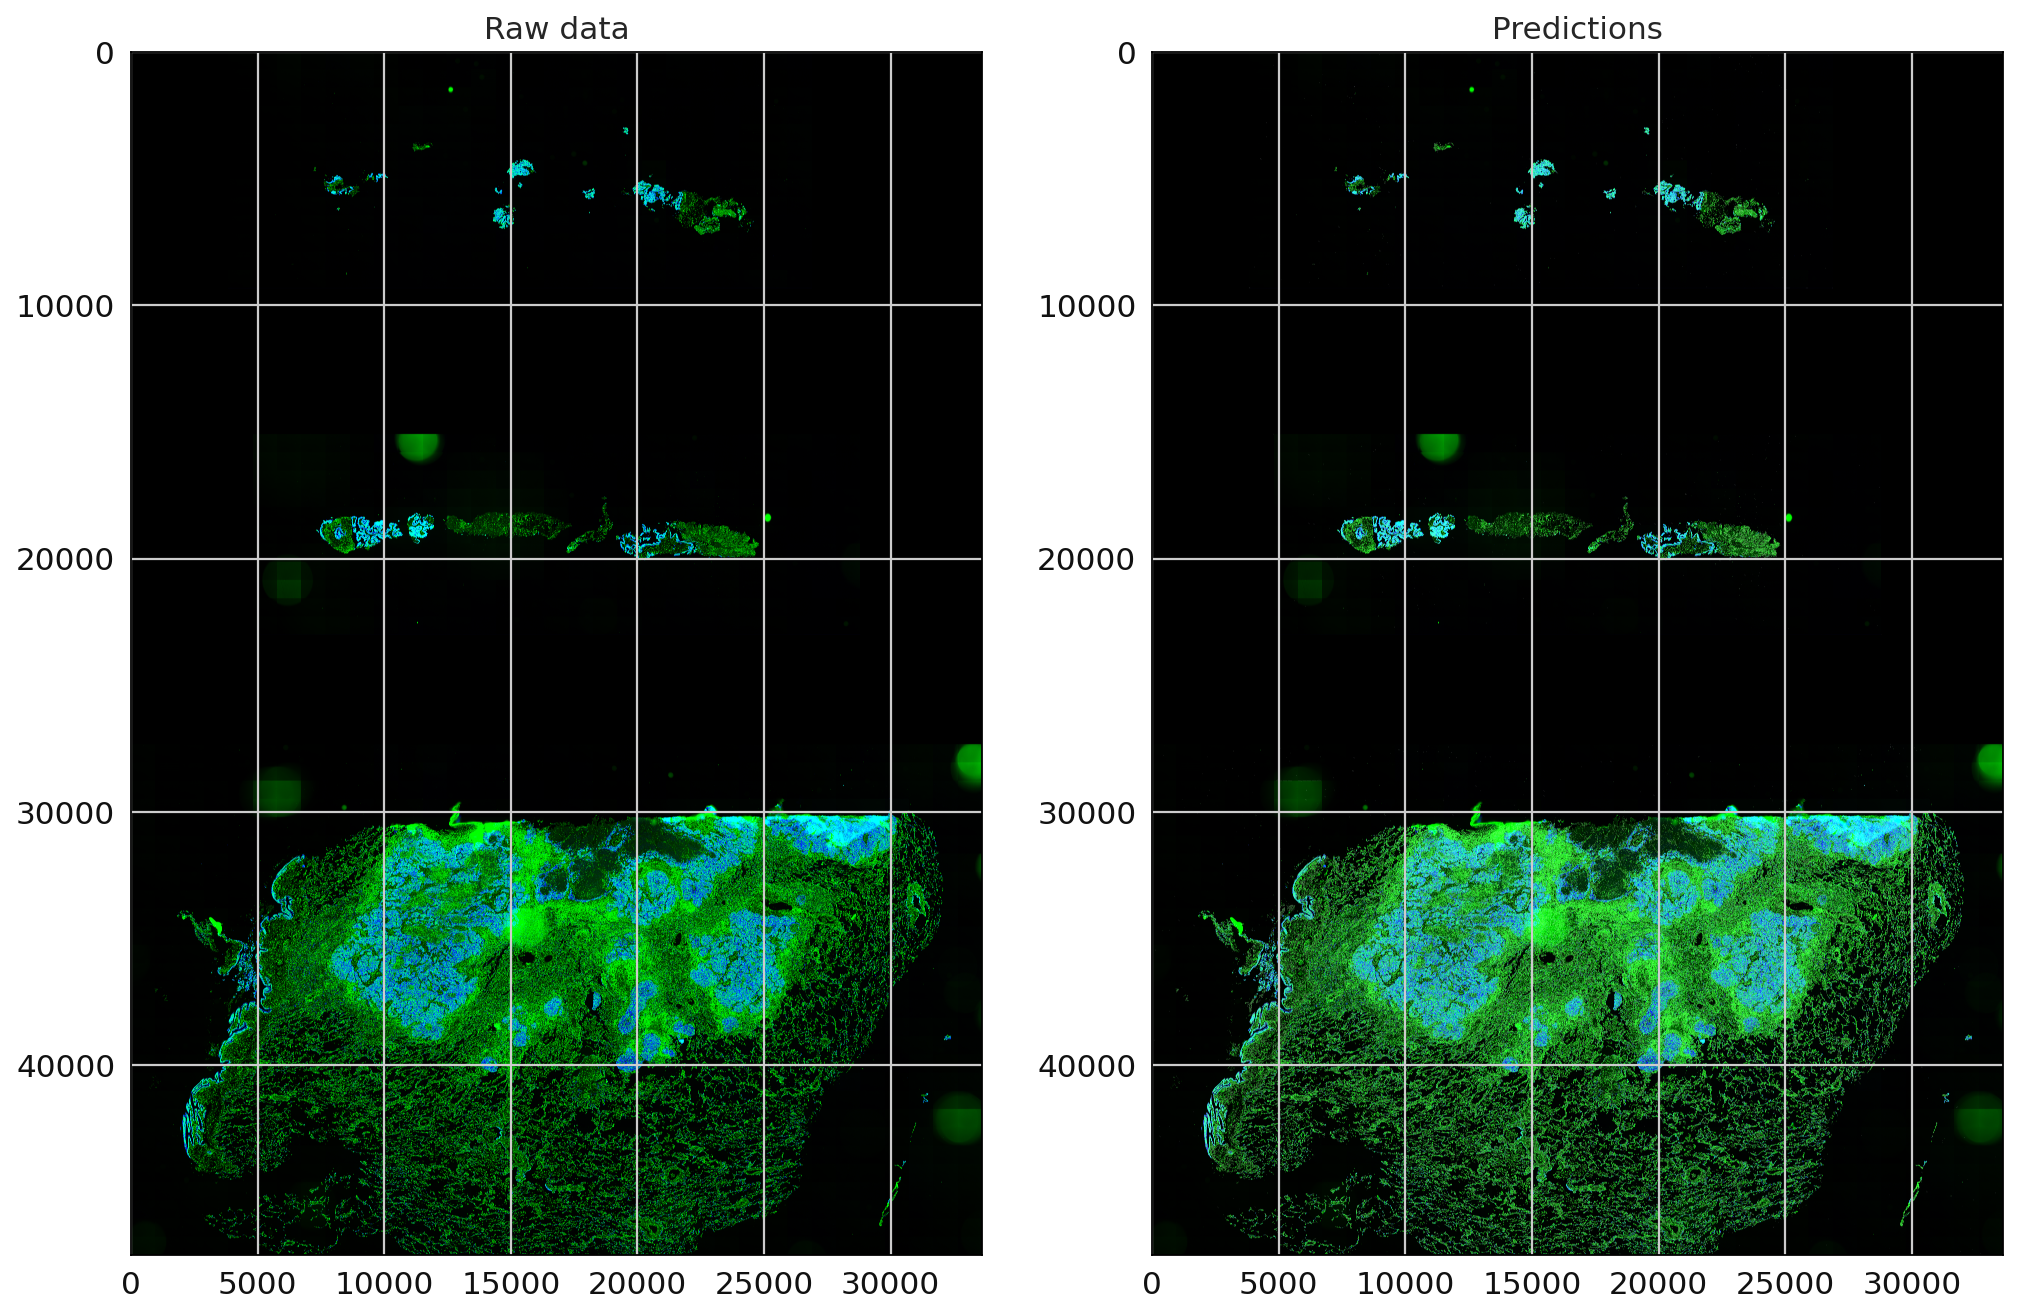

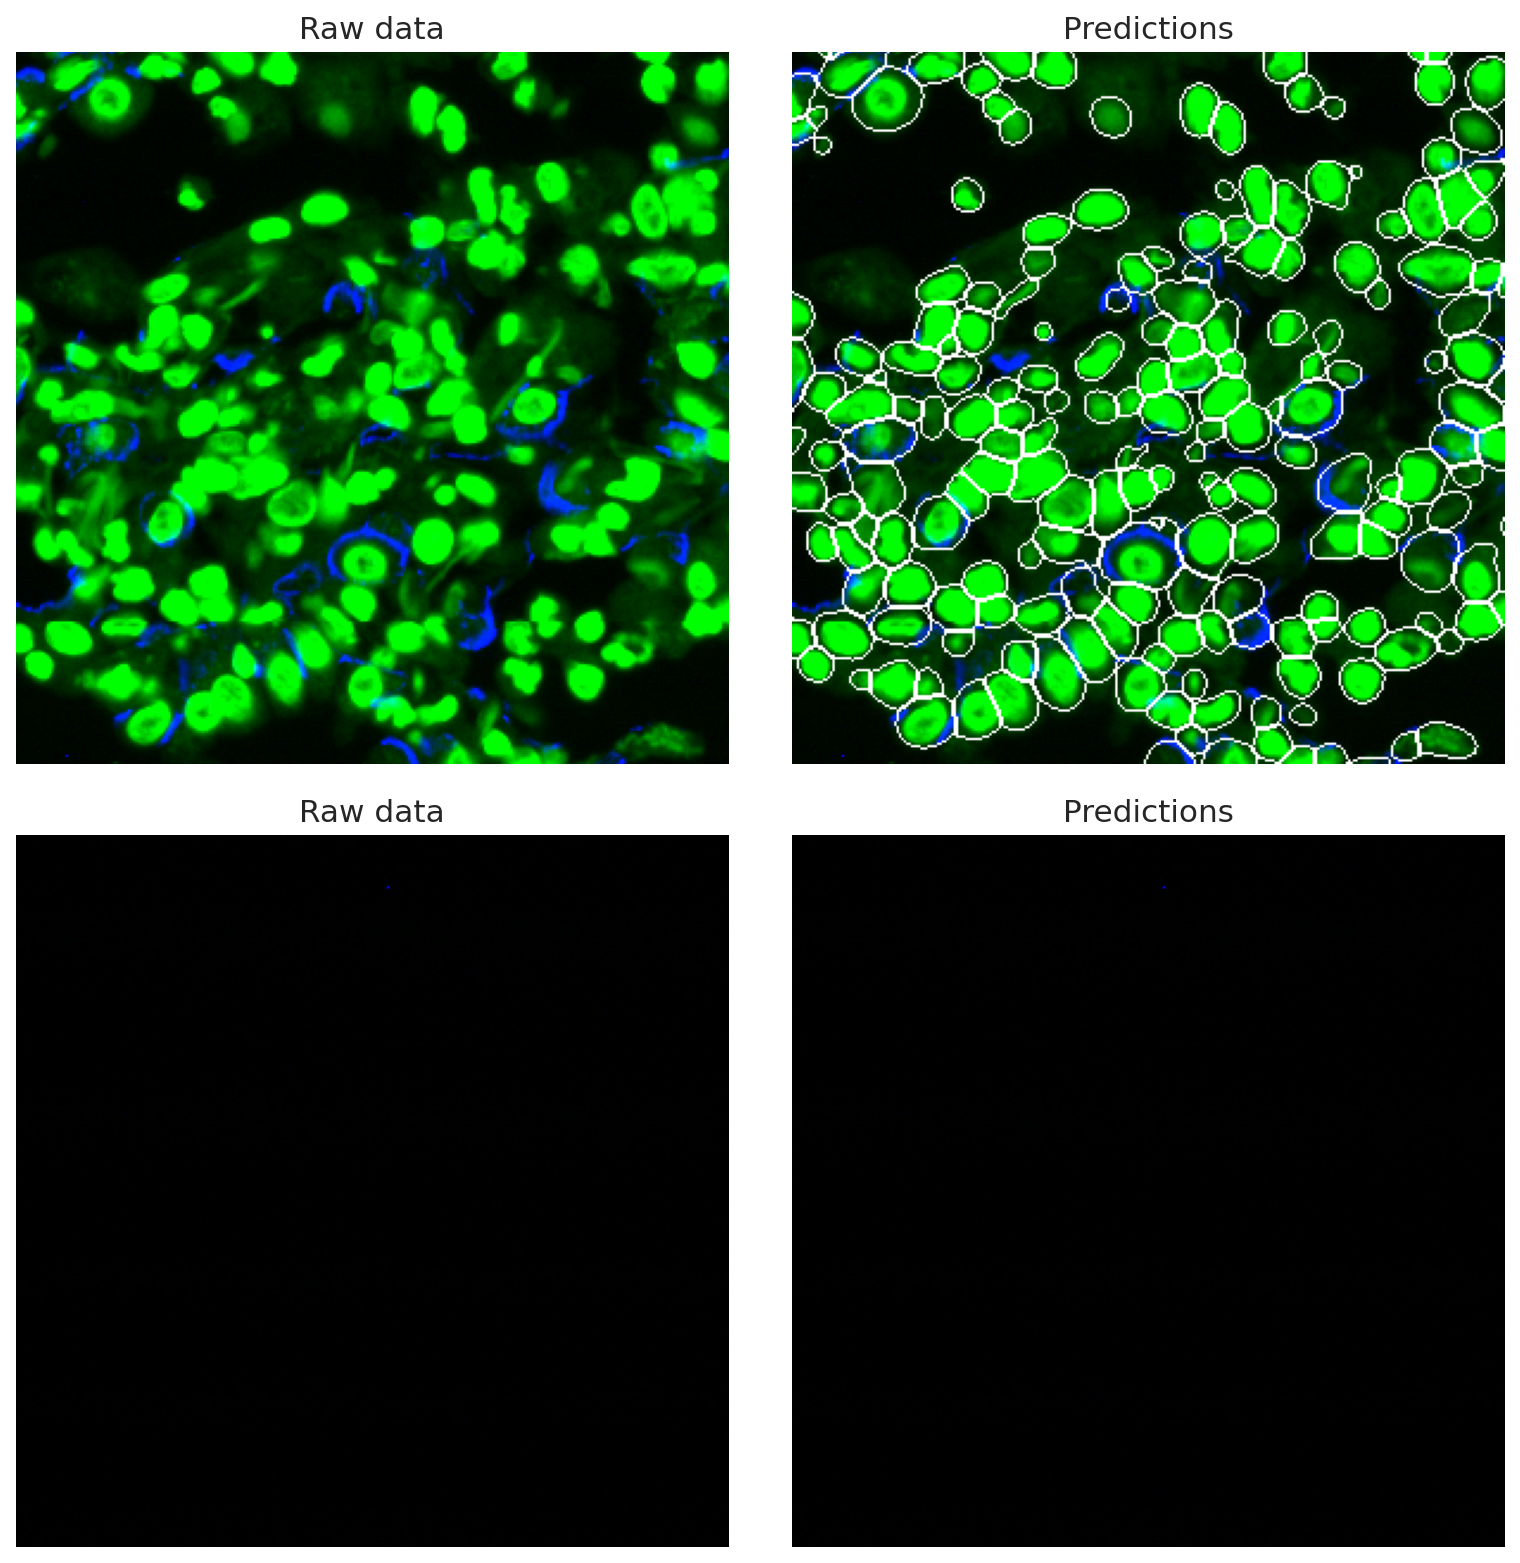

In [11]:
overlay_data, rgb_images = sp.pl.show_masks(
    seg_output=seg_output,
    nucleus_channel = 'DAPI', # channel used for nuclei segmentation (displayed in blue)
    additional_channels = ['E-cadherin','Pan_Cytokeratin'], # additional channels to display (displayed in green - channels will be combined into one image)
    show_subsample = True, # show a random subsample of the image
    n=2, #need to be at least 2
    tilesize = 300,# number of subsamples and tilesize
    rand_seed = 1)

Formatting Multichannel image (57 channels)...
Formatted 57 Multichannel channels.
Combining channels ['E-cadherin'] into 'segmentation_channel' using max projection.


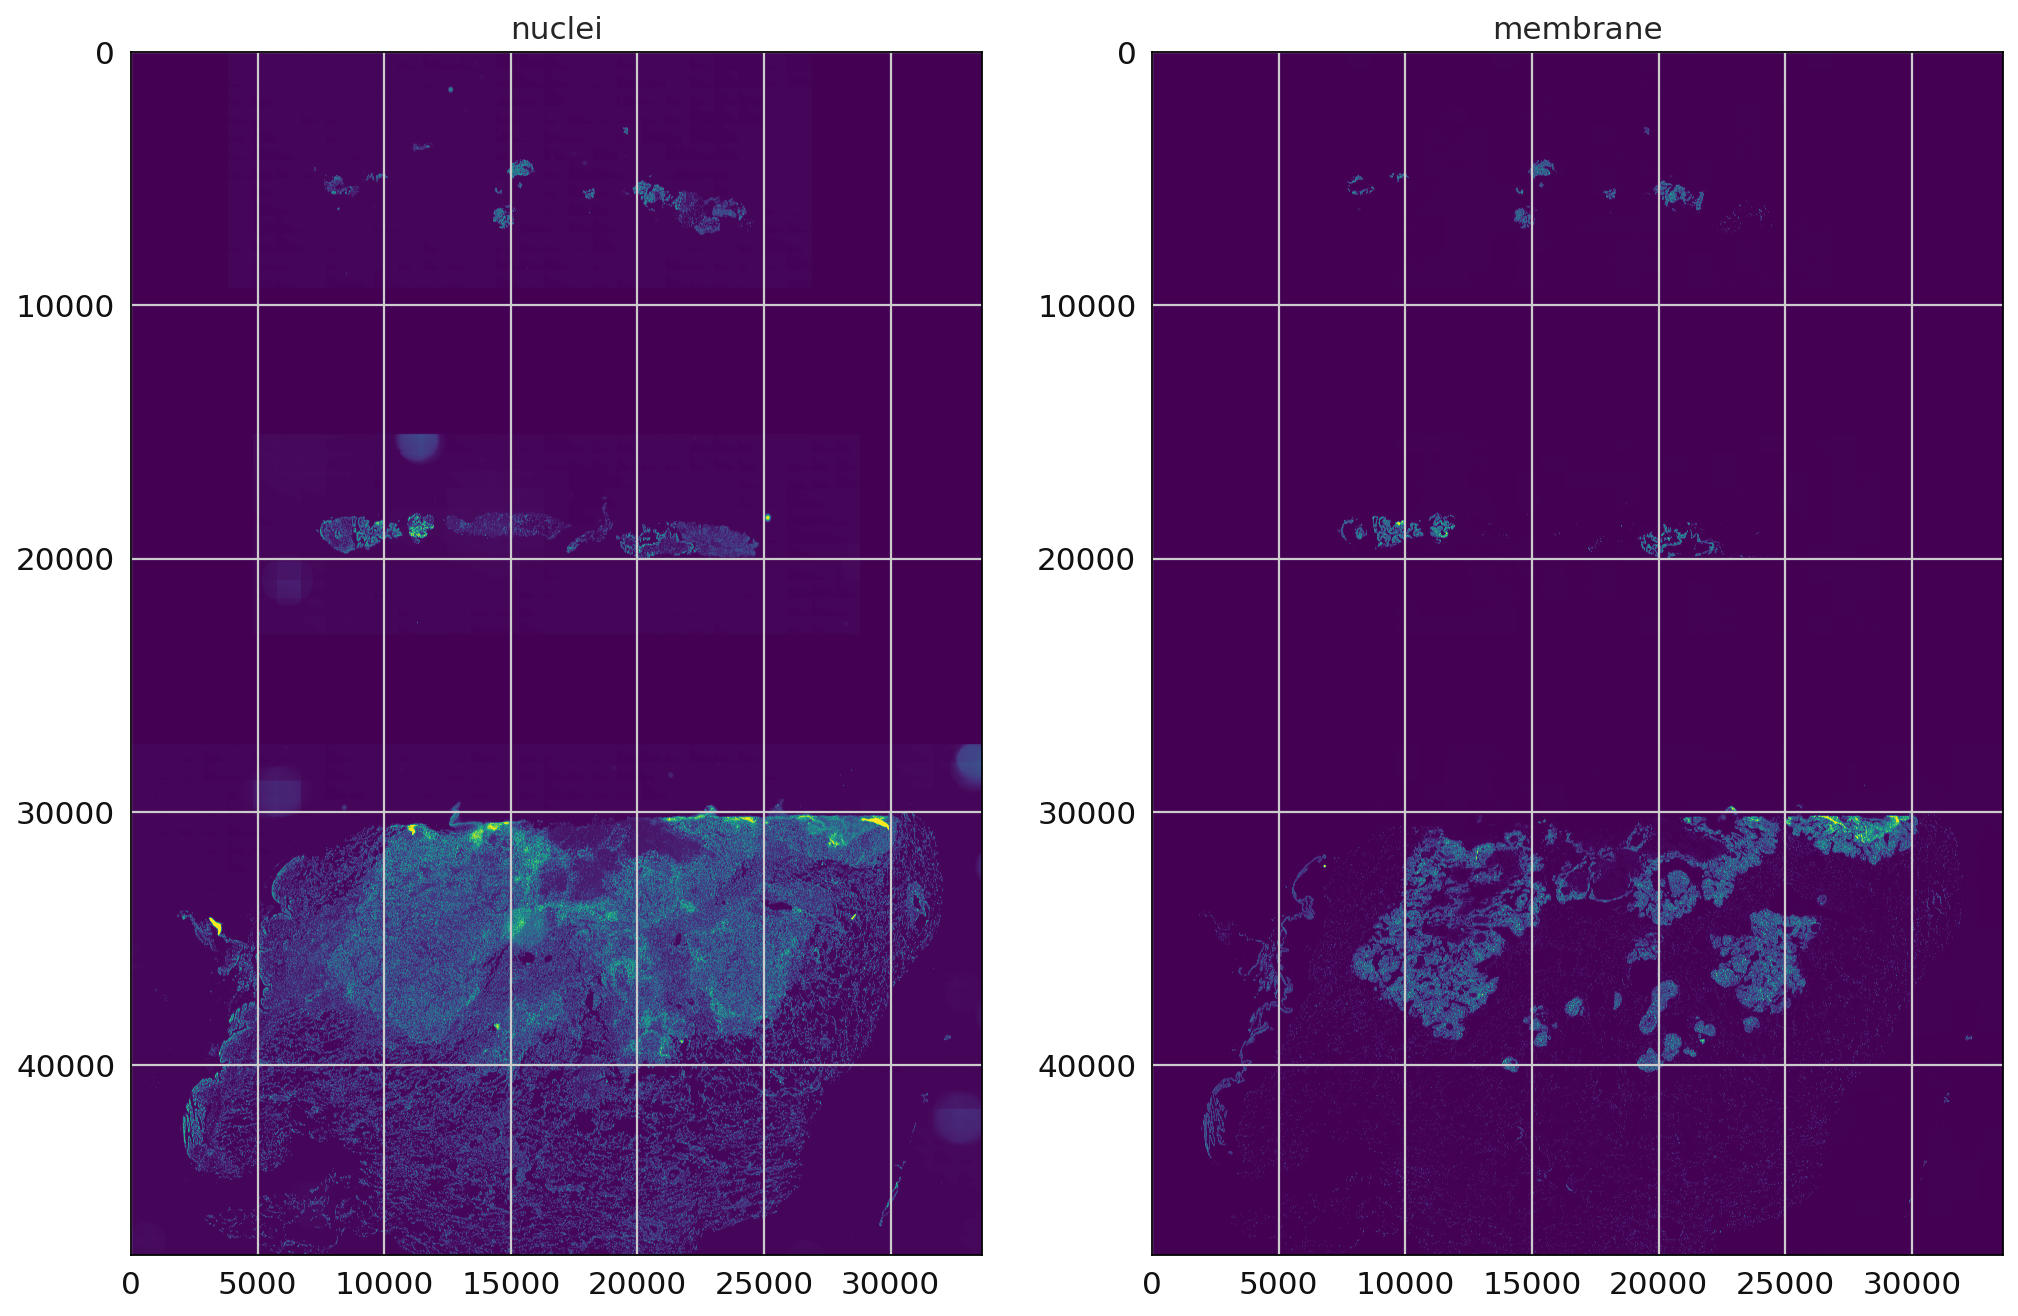

In [12]:
# (optional, one can just use nuclei for segmentation)
# Visualize membrane channels to use for cell segmentation 

sp.pl.segmentation_ch(
    file_name = file_path, # image for segmentation
    channel_file = output_dir + 'channelnames_NSCLC.txt', # all channels used for staining
    output_dir = output_dir, #
    extra_seg_ch_list = ['E-cadherin','Pan_Cytokeratin'], #default is None; if provide more than one channel, then they will be combined
    nuclei_channel = 'DAPI', # channel to use for nuclei segmentation
    input_format = 'Multichannel', 
)